<h1> Amazon Apparel Recommendations Engine</h1>

Skills: Python, text processing, image processing

# Problem Statement

Recommendation engine which suggests  similar products to the given product in any e-commerce websites ex. Amazon.com, myntra.com etc.

Ex.Recommend similar apparel products using product descriptions and Images

<tr> 
<td><img src="apperalrecommend.png",width=300,height=300> </td>
</tr>

In this project I will build a recommendation engine that suggests relevant apparels to the given apparel.The recommendation engine, uses information about 1,80,000 products and  each product will have multiple features named.

1.Title of the product <br> 
2.Brand of the product <br>
3.Color of the product <br>
4.Type of the product <br>
5.Image of the apparel <br>

Data Source: Amazon.com



### Exploring the data(Data Understanding)
Let’s start with importing the necessary libaries, reading the data, and analyze the dataset.

In [1]:
#import all the necessary packages.

import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:

#Load the amazon tops_fashion json file which consists of all information about the products
data = pd.read_json('tops_fashion.json')

# Success - Display the first record
display(data.head(n=1))

,asin,author,availability,availability_type,brand,color,editorial_reivew,editorial_review,formatted_price,large_image_url,manufacturer,medium_image_url,model,product_type_name,publisher,reviews,sku,small_image_url,title
0,B016I2TS4W,None,None,None,FNC7C,None,NaN,Minions Como Superheroes Ironman Women's O Nec...,None,https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,None,SHIRT,None,"[False, https://www.amazon.com/reviews/iframe?...",None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Long Sleeve R...


In [3]:
print ('Number of data points : ', data.shape[0], \
       '\nNumber of features/variables:', data.shape[1],'\n\n')

#Checking out the datatypes of the features
data.info()

Number of data points :  183138 
Number of features/variables: 19 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183138 entries, 0 to 183137
Data columns (total 19 columns):
asin                 183138 non-null object
author               1 non-null object
availability         24532 non-null object
availability_type    24559 non-null object
brand                182987 non-null object
color                64956 non-null object
editorial_reivew     180380 non-null object
editorial_review     2758 non-null object
formatted_price      28395 non-null object
large_image_url      183138 non-null object
manufacturer         42899 non-null object
medium_image_url     183138 non-null object
model                62370 non-null object
product_type_name    183138 non-null object
publisher            42899 non-null object
reviews              183138 non-null object
sku                  363 non-null object
small_image_url      183138 non-null object
title                183138 non-null object
d

#### A simple investigation of the dataset can determine many irrlevent features in dataset such as author, availability .

Of these 19 features, I am using only 7 features.
    1. asin  ( Amazon standard identification number)
    2. brand ( brand to which the product belongs to )
    3. color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
    4. medium_image_url  ( url of the image )
    5. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
    6. title (title of the product.)
    7. formatted_price (price of the product)
    
So,Let's shrink our dataset to the only following features.

In [4]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

After shrinking no of features in dataset our dataset have following fetures. Heare I am printing top 3 records of dataset.

In [5]:
print ('Number of data points : ', data.shape[0], \
       '\nNumber of features:', data.shape[1])
data.head(3) # prints the top 3 rows in the table.

Number of data points :  183138 
Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None


## Analyzing various features of the dataset.

####  Basic stats for the feature: product_type_name

In [6]:
# We have total 72 unique type of product_type_names
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


So, from above stats we can see that each product have their product name since count is equal to no of records in our dataset. So,there is no any missing value for this feature and there is 72 unique product name in our dataset with most frequent is shirt.<br><br>
Here is name of the different product.

In [7]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [8]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

####  Basic stats for the feature: brand


In [9]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


Here in brand features there is missing valuse for some products(record) since count is only 182987 while total no of records is 183138.<br><br>
So, No of missing values = 183138 - 182987 = 151.<br>
And there is 10577 unique brand in dataset with Most frequent one is Zago.

In [10]:
#find the 10 most frequent brand
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

####  Basic stats for the feature: color

In [11]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


Only 64956 products have their color information.<br>
So, No of missing values = 183138-64956 = 118182.<br>
Only 35.4 % products have their color information.

In [12]:
#find the 10 most frequent color
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

####  Basic stats for the feature: formatted_price

In [13]:
 print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


Only 28,395 (15.5% of whole data) products have price information so there is lot of missing values for price feature in dataset.

In [14]:
#find the 10 most frequent price from dataset.
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

#### Basic stats for the feature: title


In [15]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


All of the products have a title feature in the dataset we can see with above outputs.<br>
<br>
Python have pickle files facilites in which we can save our data at any point of time. Since we have reduced the feature in dataset so we can save our dataset in pickle folder such that if we stuck at any point we can take directly data from pickle folder so that we don't need to repeat the all step again.

In [16]:
data.to_pickle('pickels/180k_apparel_data')

## Data cleaning and preprocessing

We have seen that in our dataset some of the features have missing values so we need to preprocess the dataset such that there should not be any inconsistency in our dataset and dataset can work efficiently with algorithms.<br>

### Missing value treatment.
    There is many methods for treatment of missing values but I am going with Deletion method in which we delete all the records where any of the variable is missing, if processing power of computer is high than we can  use another methods such as mean/median/mode imputation for missing value instead of deletion method.
   We have seen that feature price in our dataset have many missing values so we can remove all such records from our dataset which don't have price information.

In [17]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/180k_apparel_data')

# data['formatted_price'].isnull() => gives the information 
#about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

Number of data points After eliminating price=NULL : 28395


 So our dataset have reduced to only 28K records after removing rcords which don't have price information.
Similarly we can remove all record which don't have color information since color feature have also missing values.

In [18]:
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])

Number of data points After eliminating color=NULL : 28385


     I brought down the number of data points from 183K to 28K.
I am processing only 28K points so that my computer can run this code in a reasonable amount of time. <br>
Now I have less no of records in our dataset so I can pickle this processed dataset such that if there is any problems at any point of time I can directly take this dataset for further processing.

In [19]:
data.to_pickle('pickels/28k_apparel_data')

### Remove duplicate items
Since in our dataset many features/attribtes such as titles of the products will be same since many products will have multiple sizes for thier products.<br>
<br>
So, let's see duplicates products for feature titles in our dataset

In [20]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/28k_apparel_data')

# find number of products that have duplicate titles.
print('Number of products that have duplicate titles =',sum(data.duplicated('title')))

Number of products that have duplicate titles = 2325


 So,we have 2325 products which have same title but These produts are exactly same except in size (S, M,L,XL). we need to de-dupe them for better results since our recommendation is very much depends on the titles of the products.

In [21]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])
data.head()

After removal of products with short description: 27949


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


Sort the whole dataset based on title (alphabetical order of title) such that it is easy to understand the dataset and also easy for deduping the similar products from dataset.


In [22]:

data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


#### Some examples of dupliacte titles that differ only in the last few words.

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

So, Remove all these kinds of titles if the title is almost similar. I am assuming the same titles if it is only differ by 2 words in the titles of the products.

In [23]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [24]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , I am considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 ,  I am considering it as those two apperals are same, hence I am ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words I am including the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between num_data_points and num_data_points-1 strings and they differ in more than 2 words than include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

Now reduce the dataset with only those products which have the same asins in the deduped dataset (dupliactes which differ only at the end)

In [25]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points : ', data.shape[0])

Number of data points :  17593


Data points in our dataset is reduced to only 17K so save this dataset in pickels file folder such that we can use this file directly if any difficulties comes during the processing.

In [26]:
data.to_pickle('pickels/17k_apperal_data')

<pre>

In the previous stage, I sorted whole data in alphabetical order of  titles.Then, I removed titles which are  adjacent and very similar title(if prefixes of titles are same), I used above algorithm for removing similar products that's only because of time complextity of the code, since in next stage of the algorithm will take O(n^2) of time complextity to find similar products in entire dataset.

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

So,I need to apply another algorithm/method to remove all those similar products which are not adjacent.

In [27]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , I am considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

Now reduce the dataset with only those products which have the same asins in the deduped dataset in previous steps

In [28]:
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]
print('Number of data points after stage two of dedupe: ',data.shape[0])

Number of data points after stage two of dedupe:  16435


from 17k apperals it reduced to 16k apperals so save it in pickel file folder such that we can use it at any point of time directly this processsed dataset.

In [29]:
data.to_pickle('pickels/16k_apperal_data')

## Text pre-processing


In [2]:
#import all the necessary packages for text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
#read preprocessed data from pickel file
data = pd.read_pickle('pickels/16k_apperal_data')

In [4]:
# use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in titles like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Convert all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [5]:
# take each title for text-preprocessing.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [6]:
# see the data after stop word removal from title of the product
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


I tried using stemming on titles but it did not work very well so no need to stemming of the text in the product title

### Show the recommendation of products using all different algorithms

In [7]:
#import all the necessary packages
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pyplot as plt
import re

In [8]:
# Utility Functions for showing the results/recommendation

#Display an image
def display_img(url,ax,fig):
    # get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.

def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        #will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel 
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, we can try 'words = text.split()' this will also gives same result
    return Counter(words)
    # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

 ### Bag of Words (BoW) on product titles.
 
 Recommendation based on the frequency of the words in the title with simple euclidean distance.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

In [10]:
title_vectorizer = CountVectorizer()
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus
title_features   = title_vectorizer.fit_transform(data['title'])
# get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
title_features.get_shape()

(16435, 12684)

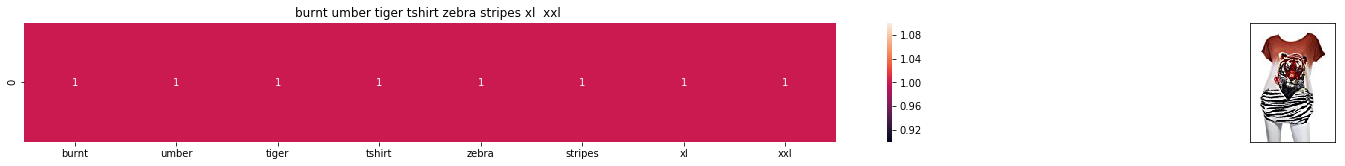

ASIN : B00JXQB5FQ
Brand: Si Row
Title: burnt umber tiger tshirt zebra stripes xl  xxl 
Euclidean similarity with the query image : 0.0


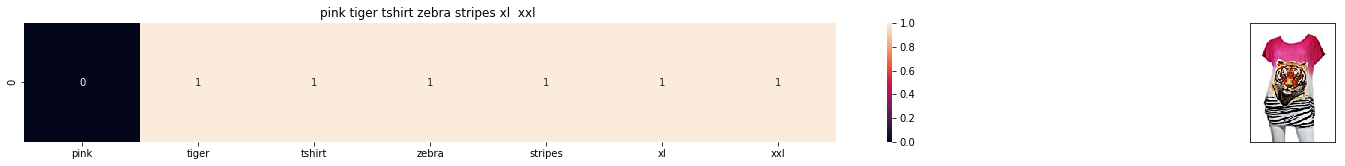

ASIN : B00JXQASS6
Brand: Si Row
Title: pink tiger tshirt zebra stripes xl  xxl 
Euclidean similarity with the query image : 1.73205080757


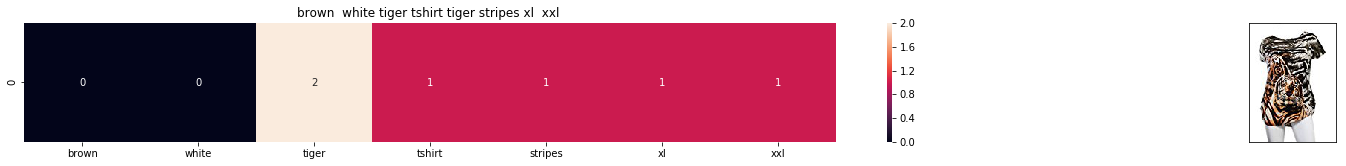

ASIN : B00JXQCWTO
Brand: Si Row
Title: brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean similarity with the query image : 2.44948974278


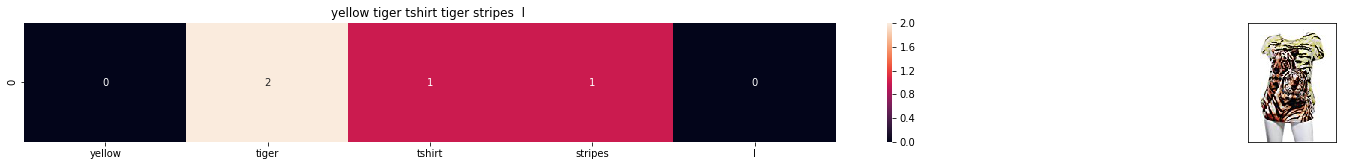

ASIN : B00JXQCUIC
Brand: Si Row
Title: yellow tiger tshirt tiger stripes  l 
Euclidean similarity with the query image : 2.64575131106


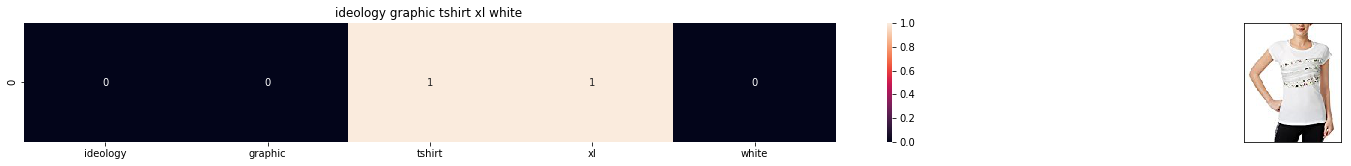

ASIN : B01NB0NKRO
Brand: Ideology
Title: ideology graphic tshirt xl white 
Euclidean similarity with the query image : 3.0


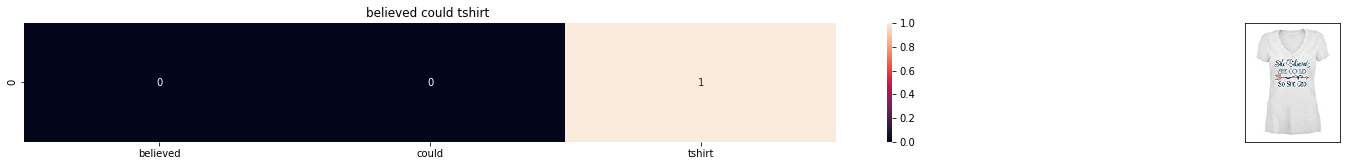

ASIN : B07568NZX4
Brand: Rustic Grace
Title: believed could tshirt 
Euclidean similarity with the query image : 3.0


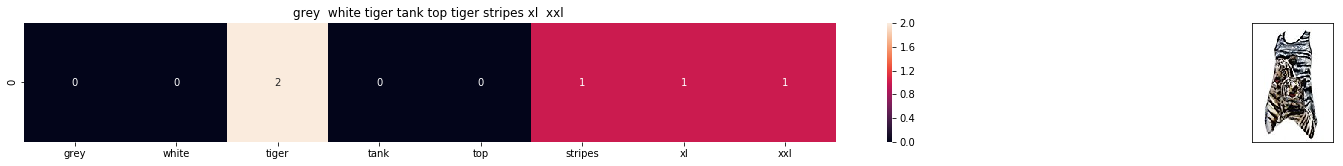

ASIN : B00JXQAFZ2
Brand: Si Row
Title: grey  white tiger tank top tiger stripes xl  xxl 
Euclidean similarity with the query image : 3.0


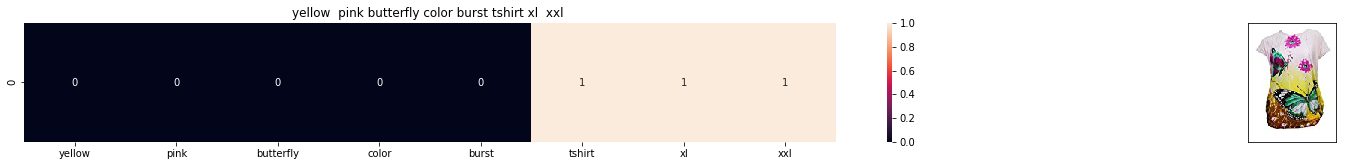

ASIN : B00JXQBBMI
Brand: Si Row
Title: yellow  pink butterfly color burst tshirt xl  xxl 
Euclidean similarity with the query image : 3.16227766017


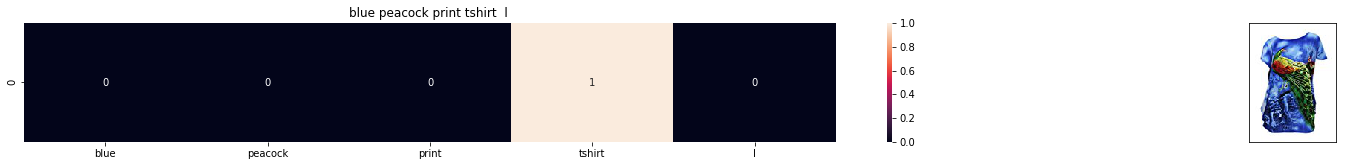

ASIN : B00JXQC8L6
Brand: Si Row
Title: blue peacock print tshirt  l 
Euclidean similarity with the query image : 3.16227766017


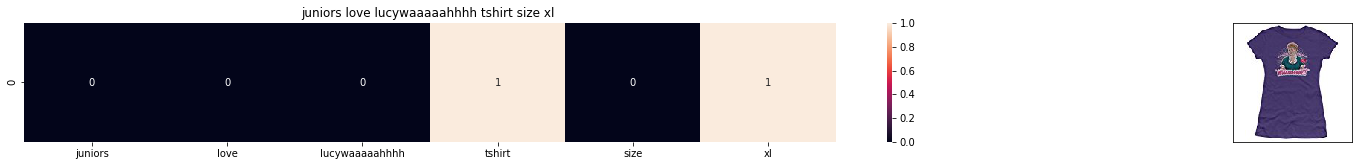

ASIN : B00IAA4JIQ
Brand: I Love Lucy
Title: juniors love lucywaaaaahhhh tshirt size xl 
Euclidean similarity with the query image : 3.16227766017


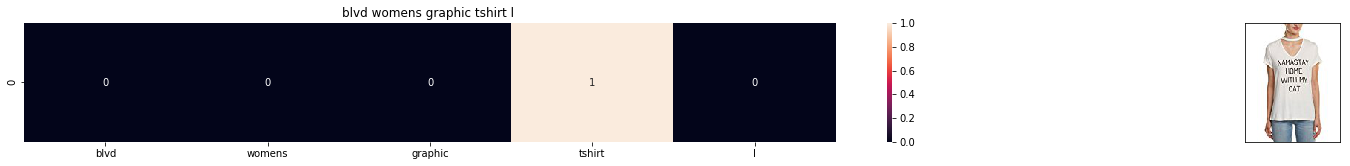

ASIN : B0733R2CJK
Brand: BLVD
Title: blvd womens graphic tshirt l 
Euclidean similarity with the query image : 3.16227766017


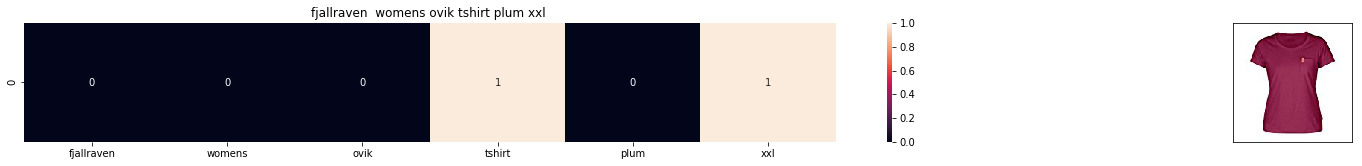

ASIN : B06XC3CZF6
Brand: Fjallraven
Title: fjallraven  womens ovik tshirt plum xxl 
Euclidean similarity with the query image : 3.16227766017


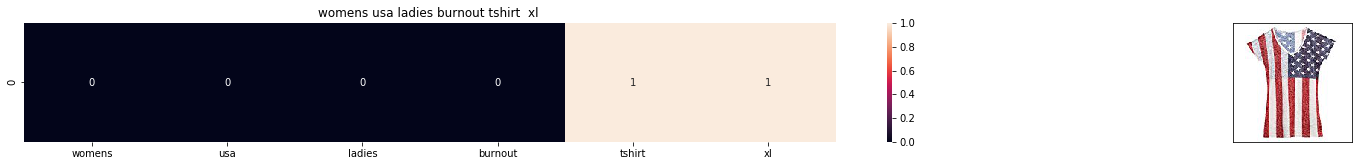

ASIN : B01F4D9CI8
Brand: Calhoun Sportswear
Title: womens usa ladies burnout tshirt  xl 
Euclidean similarity with the query image : 3.16227766017


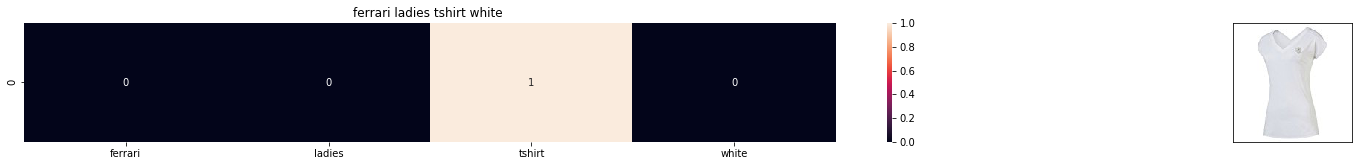

ASIN : B015YKMU80
Brand: PUMA
Title: ferrari ladies tshirt white 
Euclidean similarity with the query image : 3.16227766017


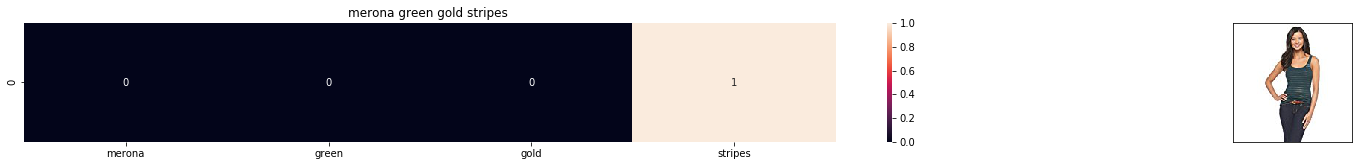

ASIN : B01KVZUB6G
Brand: Merona
Title: merona green gold stripes 
Euclidean similarity with the query image : 3.16227766017


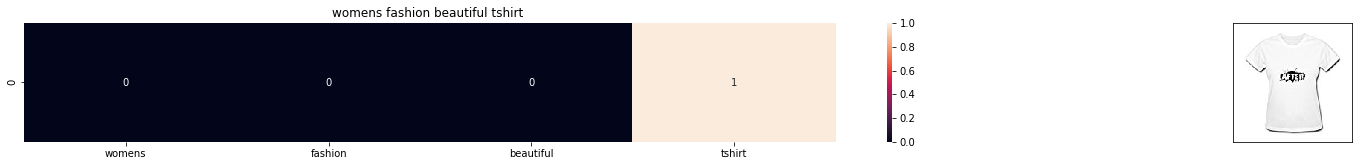

ASIN : B074VMNZN9
Brand: simple
Title: womens fashion beautiful tshirt 
Euclidean similarity with the query image : 3.16227766017


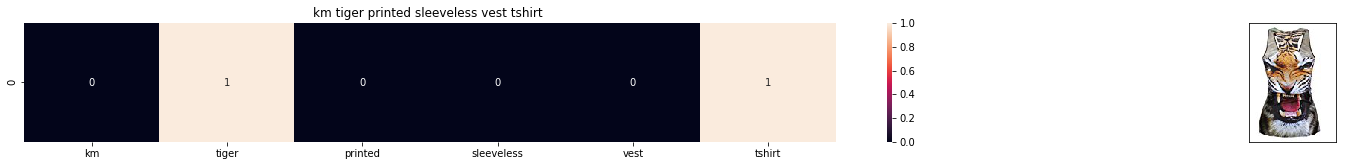

ASIN : B012VQLT6Y
Brand: KM T-shirt
Title: km tiger printed sleeveless vest tshirt 
Euclidean similarity with the query image : 3.16227766017


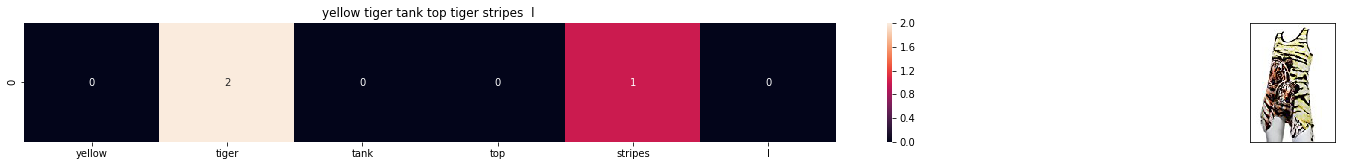

ASIN : B00JXQAUWA
Brand: Si Row
Title: yellow tiger tank top tiger stripes  l 
Euclidean similarity with the query image : 3.16227766017


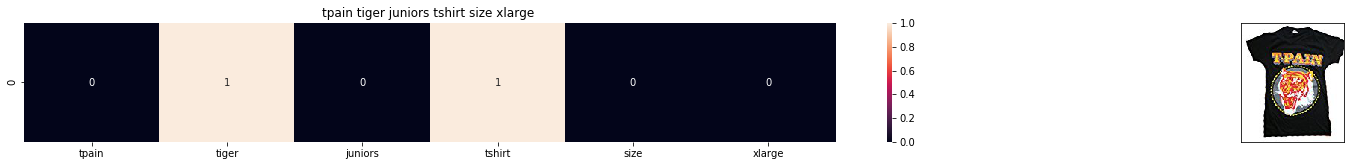

ASIN : B01K0H02OG
Brand: Tultex
Title: tpain tiger juniors tshirt size xlarge 
Euclidean similarity with the query image : 3.16227766017


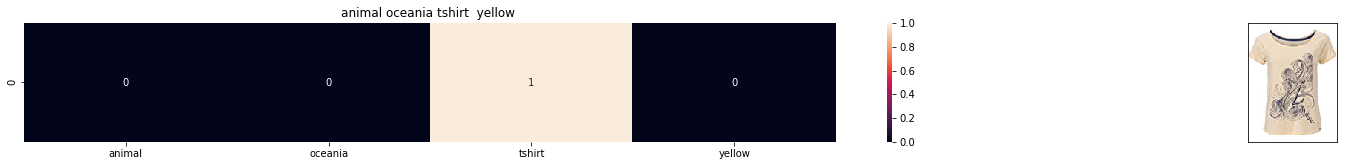

ASIN : B06X6GX6WG
Brand: Animal
Title: animal oceania tshirt  yellow 
Euclidean similarity with the query image : 3.16227766017


In [11]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus  
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    #data frame indices of the smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12921, 20)

# change the index if you want to.